In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
df = pd.read_csv("datasetnew3.csv")


In [3]:
df.tail

<bound method NDFrame.tail of              id                       Model  Year     Company    Price Engine  \
0     200716453            Honda N Box 2018  2018       Honda  3400000   1310   
1     200716455     Honda N WGN Custom 2018  2018       Honda  3800000    658   
2     200716452       Honda S660 Alpha 2017  2017       Honda  3900000    658   
3     200701070  Honda Fit GP5 S Grade 2018  2018       Honda  6200000   1496   
4     200716458       Honda Fit GP5 DX 2018  2018       Honda  6700000   1496   
...         ...                         ...   ...         ...      ...    ...   
1305  200705595                         CK1  1999  Mitsubishi   800000   1200   
1306  200481163                         CB1  1994  Mitsubishi  1280000   1500   
1307  200677384                 Pajero Mini  1999  Mitsubishi  2650000   1500   
1308  200693702                      petrol  2007  Mitsubishi  8100000   4000   
1309  200693703                  CS1 Saloon  2004  Mitsubishi  1925000   1200  

Text(0, 0.5, 'Price')

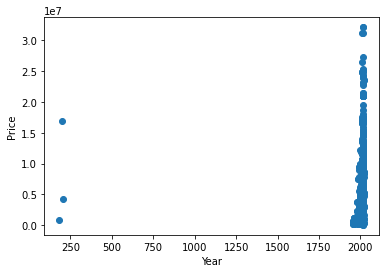

In [26]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [5]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine          object
FuelType        object
Transmission    object
dtype: object

In [6]:
df["Transmission"] = df["Transmission"].astype(str)

In [7]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine          object
FuelType        object
Transmission    object
dtype: object

In [8]:
df = df.astype({"Engine": int})

Text(0, 0.5, 'Engine')

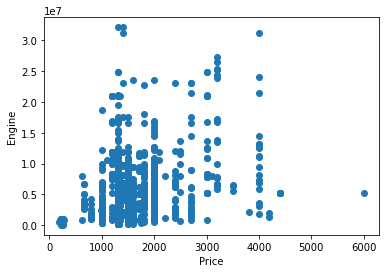

In [9]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Price")
plt.ylabel("Engine")

Text(0, 0.5, 'Transmission')

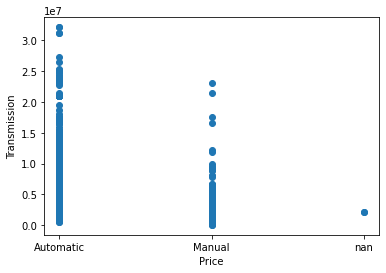

In [89]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Price")
plt.ylabel("Transmission")

In [92]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'FuelType')

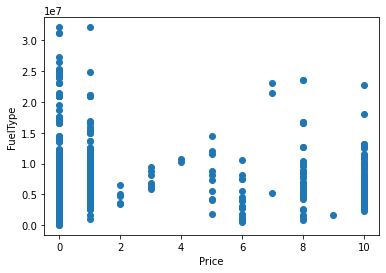

In [129]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("Price")
plt.ylabel("FuelType")

In [10]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic', 'Manual', 'nan']
['petrol', 'HybridPetrol', 'Petrol-Electric', 'petrol ', 'hybrid ', 'Diesel', 'Petrol', 'petrol/Diesel', 'Electric', nan, 'Diesel/Petrol']
0
1
0
0
id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int32
FuelType         int32
Transmission     int32
dtype: object
<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       1
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: FuelType, Length: 1310, dtype: int32>
<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       0
       ..
1305    0
1306    0
1307    0
1308    0
1309    0
Name: Transmission, Length: 1310, dtype: int32>


In [13]:
X = df[['Year','Engine','Transmission','FuelType']]
y = df['Price']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [15]:
print(X_train) 

      Year  Engine  Transmission  FuelType
905   2002    1300             1         0
339   1983     216             1         0
1200  2018    1800             0         0
393   2017    2000             0         8
607   2003    1600             1         0
...    ...     ...           ...       ...
126   1990    1323             1         0
104   2018    1400             0         1
342   2006     216             1         0
6     2018    1496             0         1
71    2017    1496             0         1

[1048 rows x 4 columns]


In [16]:
print(X_test)

      Year  Engine  Transmission  FuelType
1001  2001    1000             1         0
40    2009    1993             0         5
228   2016    1350             0         0
737   2014    1500             0         0
1162  2000    1800             1         0
...    ...     ...           ...       ...
953   2008    2400             0        10
877   2014    2700             0         0
1254  2010    1500             0        10
840   2012    1495             0         0
971   2007    2000             1        10

[262 rows x 4 columns]


In [18]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
clf.predict(X_test)

array([ 1791011.54903461,  7860869.97200941,  6385082.28741845,
        6667659.06304692,  3297064.28576702,   377386.58816787,
        3672598.1820643 ,  1204124.22953186,  7610146.28293184,
        7232812.61430386,  7661910.08574391,  6720163.9485834 ,
        2355424.01756714,  1790588.07319209,  3108820.92729555,
        7043828.17310798,  6292336.9046709 ,  6984648.9880034 ,
        6667659.06304692,  6720163.9485834 ,  3297064.28576702,
        6713057.69008706,  2397978.90729117,  7662015.95470454,
        6720587.42442592,  7285635.10672222,  6290748.87026146,
        2920048.22402093,  6292231.03571028,  1791223.28695587,
        8627761.52371271,  4202834.61649992,  6291172.34610398,
        6343888.96956171,  6637777.31286992,  6149975.03068215,
        7231965.66261882,  6290960.60818272,  6291172.34610398,
        3672492.31310367,  7279246.72324367,  7661486.60990139,
        6103458.33243565,   283264.90893213,  6720163.9485834 ,
        5967719.85950066,  6720163.94858

In [22]:
print(y_test)

1001     6675000
40       4200000
228     21000000
737      3650000
1162     3000000
          ...   
953      8100000
877      1295000
1254     5350000
840      4450000
971      5850000
Name: Price, Length: 262, dtype: int64


In [23]:
print(clf.score(X_test, y_test))

0.25521225035976536
